# Nonconvex Optimization for OPF problems

### Purdue | Ruben Dario Castro Terrazas 


## Introduction

The following

### AC-OPF problem

Objective function and constraints from the **Alternating Current Optimal Power Flow** problem.

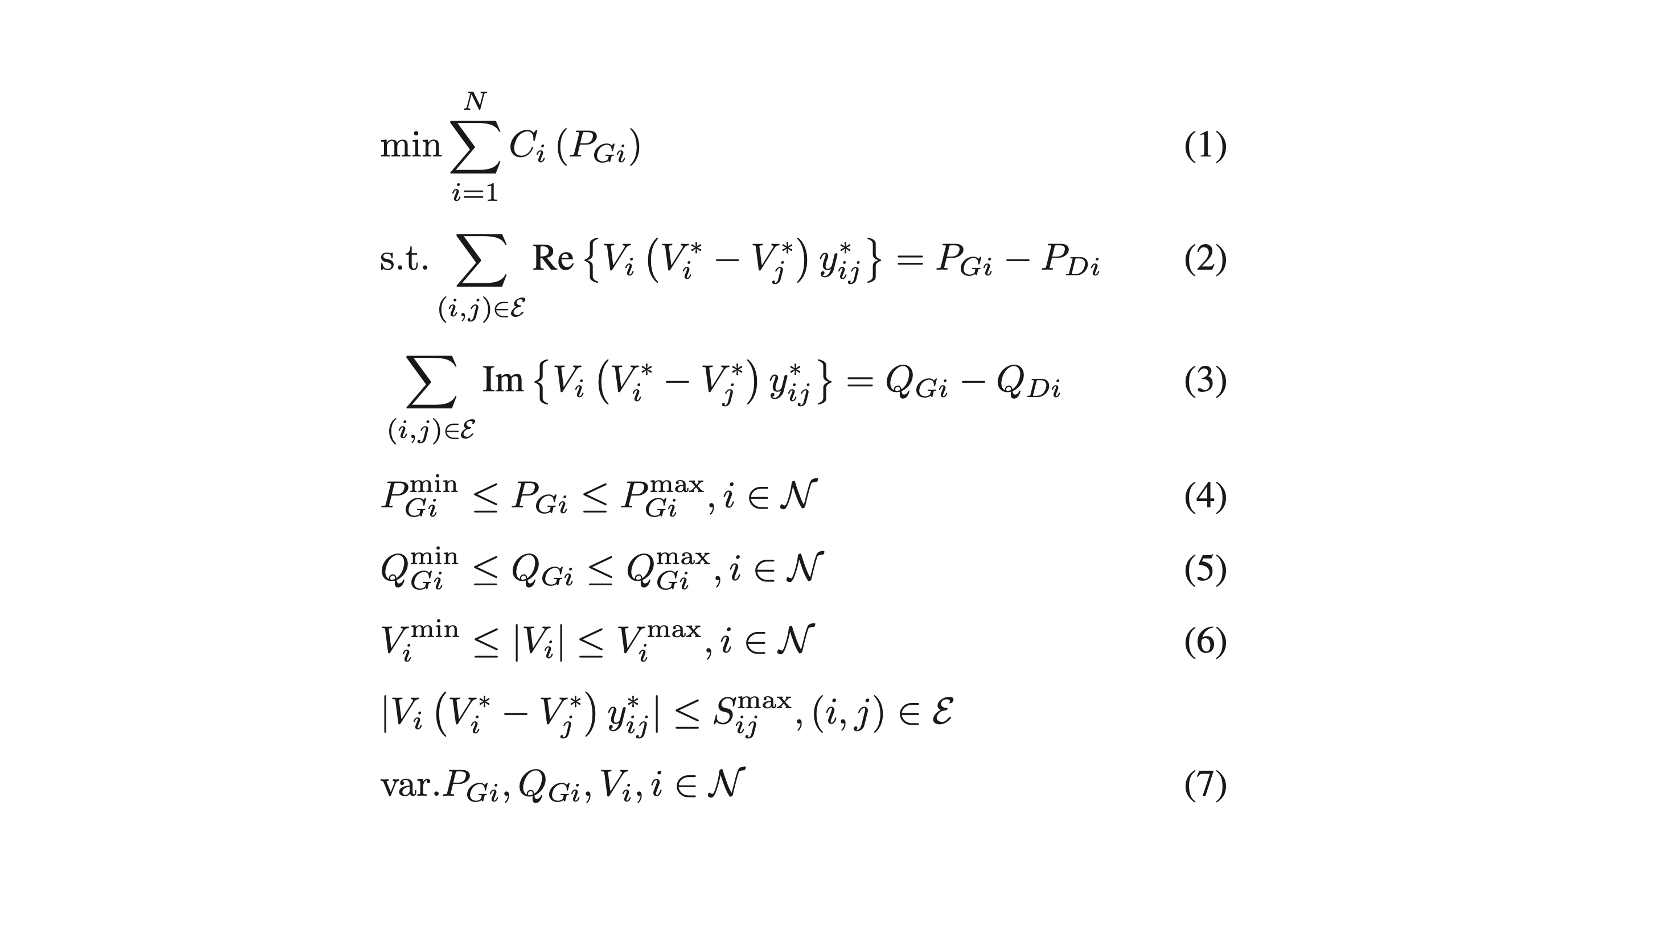



#### Variables and parameters

* **$P_{G_i}$**: Active power at generator i
* **$Q_{G_i}$**: Reactive power at generator i
* **$P_{D_i}$**: Active power demand load at bus i
* **$G_{D_i}$**: Reactive power demand load at bus i
* **$V_i$**: Voltage magnitude at bus i
* **$S_{ij}$**: Complex power from bus i to j, where
    * $S_{ij} =  P_{ij} + jQ_{ij}$
* **$Y_{ij}$**: Admittance of line ij,where 
    * $Y = G  + jB$
    * G(conductance): Measures the ability of the line to conduct electric current. It represents the real part of the admittance and indicates the power dissipation in the line due to resistance. Higher conductance implies lower energy losses.
    * B(Susceptance): Represents the imaginary part of admittance and is crucial for understanding the capacitive or inductive nature of the line. Susceptance affects the reactive power flow and voltage regulation across the line.


#### Constraints

- **Objective function** (Equation 1):
The objective is to minimize the sum of the costs associated with the real power generation at each bus.
- **Power flow constraints** (Equations 2 and 3):
These constraints ensure that the real and reactive power balance is maintained at each bus, accounting for the complex power flows in the network.
- **Variable bounds** (Equations 4-6):
These constraints impose limits on the real and reactive power generation, as well as the voltage magnitudes at each bus, to ensure the feasibility of the solution.
- **Apparent power flow limit** (Equation 6):
This constraint limits the <i>apparent power</i> flow (i.e., magnitude of the complex power flow) through each transmission line or transformer to a maximum value, ensuring that the system operates within its physical limits.
- **Optimization variables** (Equation 7):
The optimization variables in this formulation are the real and reactive power generation, and the complex voltage (magnitude and angle).

### Import libraries and dependencies

In [1]:
from os.path import join
import numpy as np
# import the solver and solver options from pypower
#from pypower.api import runopf, ppoption
import jax.numpy as jnp
from pypower.loadcase import loadcase
from pypower.ext2int import ext2int
from pypower.makeYbus import makeYbus

## Preparing the Data

We can read the test data in two ways:

* Use  the `read_data_pglib.py` file to execute the .m files
* Use the test cases from the Pypower library

In [2]:
#from read_data_pglib import read_matpower_powergrid
#dir_myFile = r'test data/PGLib OPF/feasible'
#net = read_matpower_powergrid(dir_myFile)
#net

In [3]:

net ={'baseMVA': 100.0,
 'bus': np.array([[  0.  ,   2.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ,
           0.  , 230.  ,   1.  ,   1.1 ,   0.9 ],
        [  1.  ,   1.  , 300.  ,  98.61,   0.  ,   0.  ,   1.  ,   1.  ,
           0.  , 230.  ,   1.  ,   1.1 ,   0.9 ],
        [  2.  ,   2.  , 300.  ,  98.61,   0.  ,   0.  ,   1.  ,   1.  ,
           0.  , 230.  ,   1.  ,   1.1 ,   0.9 ],
        [  3.  ,   3.  , 400.  , 131.47,   0.  ,   0.  ,   1.  ,   1.  ,
           0.  , 230.  ,   1.  ,   1.1 ,   0.9 ],
        [  4.  ,   2.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ,
           0.  , 230.  ,   1.  ,   1.1 ,   0.9 ]]),
 'gen': np.array([[   0. ,   20. ,    0. ,   30. ,  -30. ,    1. ,  100. ,    1. ,
           40. ,    0. ],
        [   1. ,   85. ,    0. ,  127.5, -127.5,    1. ,  100. ,    1. ,
          170. ,    0. ],
        [   2. ,  260. ,    0. ,  390. , -390. ,    1. ,  100. ,    1. ,
          520. ,    0. ],
        [   3. ,  100. ,    0. ,  150. , -150. ,    1. ,  100. ,    1. ,
          200. ,    0. ],
        [   4. ,  300. ,    0. ,  450. , -450. ,    1. ,  100. ,    1. ,
          600. ,    0. ]]),
 'gencost': np.array([[ 2.,  0.,  0.,  3.,  0., 14.,  0.],
        [ 2.,  0.,  0.,  3.,  0., 15.,  0.],
        [ 2.,  0.,  0.,  3.,  0., 30.,  0.],
        [ 2.,  0.,  0.,  3.,  0., 40.,  0.],
        [ 2.,  0.,  0.,  3.,  0., 10.,  0.]]),
 'branch': np.array([[ 0.000e+00,  1.000e+00,  2.810e-03,  2.810e-02,  7.120e-03,
          4.000e+02,  4.000e+02,  4.000e+02,  0.000e+00,  0.000e+00,
          1.000e+00, -3.000e+01,  3.000e+01],
        [ 0.000e+00,  3.000e+00,  3.040e-03,  3.040e-02,  6.580e-03,
          4.260e+02,  4.260e+02,  4.260e+02,  0.000e+00,  0.000e+00,
          1.000e+00, -3.000e+01,  3.000e+01],
        [ 0.000e+00,  4.000e+00,  6.400e-04,  6.400e-03,  3.126e-02,
          4.260e+02,  4.260e+02,  4.260e+02,  0.000e+00,  0.000e+00,
          1.000e+00, -3.000e+01,  3.000e+01],
        [ 1.000e+00,  2.000e+00,  1.080e-03,  1.080e-02,  1.852e-02,
          4.260e+02,  4.260e+02,  4.260e+02,  0.000e+00,  0.000e+00,
          1.000e+00, -3.000e+01,  3.000e+01],
        [ 2.000e+00,  3.000e+00,  2.970e-03,  2.970e-02,  6.740e-03,
          4.260e+02,  4.260e+02,  4.260e+02,  0.000e+00,  0.000e+00,
          1.000e+00, -3.000e+01,  3.000e+01],
        [ 3.000e+00,  4.000e+00,  2.970e-03,  2.970e-02,  6.740e-03,
          2.400e+02,  2.400e+02,  2.400e+02,  0.000e+00,  0.000e+00,
          1.000e+00, -3.000e+01,  3.000e+01]])}


In [4]:
net['baseMVA']

100.0

In [5]:
Ybus,Yf,Yt = makeYbus(net['baseMVA'],net['bus'],net['branch'])#Admittance matrix
Ybus = Ybus.toarray()

In [6]:
demand_load = net['bus'][:,2:4] #Pg and Qg demand for each bus

pd = demand_load[:,0]
qd = demand_load[:,1]
G = jnp.array(np.real(Ybus)) #Conductance matrix
B = jnp.array(np.imag(Ybus)) #Susceptance matrix

G,B

(Array([[ 22.250685 ,  -3.523484 ,   0.       ,  -3.2569046, -15.470297 ],
        [ -3.523484 ,  12.691068 ,  -9.167583 ,   0.       ,   0.       ],
        [  0.       ,  -9.167583 ,  12.50125  ,  -3.3336668,   0.       ],
        [ -3.2569046,   0.       ,  -3.3336668,   9.924238 ,  -3.3336668],
        [-15.470297 ,   0.       ,   0.       ,  -3.3336668,  18.803965 ]],      dtype=float32),
 Array([[-222.48438 ,   35.23484 ,    0.      ,   32.569046,  154.70297 ],
        [  35.23484 , -126.89786 ,   91.675835,    0.      ,    0.      ],
        [   0.      ,   91.675835, -124.99987 ,   33.336666,    0.      ],
        [  32.569046,    0.      ,   33.336666,  -99.23235 ,   33.336666],
        [ 154.70297 ,    0.      ,    0.      ,   33.336666, -188.02063 ]],      dtype=float32))

In [7]:
def create_S(net_branches,G,B):
    branch_data = net_branches[:,:6]
    S = np.zeros((B.shape[0], B.shape[1]))

    # Populate S matrix
    for branch in branch_data:
        fbus = int(branch[0])   # From bus (zero-based index)
        tbus = int(branch[1])  # To bus (zero-based index)
        rateA = branch[5]          # Thermal limit

        # Set thermal limits in S matrix
        S[fbus, tbus] = rateA
        S[tbus, fbus] = rateA  # Assuming the network is undirected

    return jnp.array(S)

S = create_S(net["branch"],G,B)
# Display the S matrix
print("S matrix (Thermal Capacity Limits):")
print(S)

S matrix (Thermal Capacity Limits):
[[  0. 400.   0. 426. 426.]
 [400.   0. 426.   0.   0.]
 [  0. 426.   0. 426.   0.]
 [426.   0. 426.   0. 240.]
 [426.   0.   0. 240.   0.]]


We define the variables

In [8]:
pg = net['gen'][:, 1]
qg = net['gen'][:, 2]

V_i = net['bus'][:, 7]
theta_i = np.radians(net['bus'][:, 8])

e = V_i  * np.cos(theta_i)
f = V_i * np.sin(theta_i)

e,f

(array([1., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0.]))

In [9]:
branch = net['branch'][:,:2]
branch

array([[0., 1.],
       [0., 3.],
       [0., 4.],
       [1., 2.],
       [2., 3.],
       [3., 4.]])

In [10]:
if 'baseMVA' in net.keys():
    del net['baseMVA']

In [11]:
net['gencost'][:,0] = net['gen'][:,0] #Index each generator

In [12]:
#Transform each data structure of the net into jax numpy
for key,matrix in net.items():
    net[key] = jnp.array(matrix)

## Solve test case 5 PJM 

Let's see how does the IPOPT solver behaves when trying to solve the original problem without dividing it into regions

In [13]:
regions = {
    1:({0,1,2,3,4},{})
}
regions

{1: ({0, 1, 2, 3, 4}, {})}

We are specifying that the problem has only one regions, with **5 interior buses** and **0 boundary buses**

From the code above, we see that we obtain the variable $x^1$, which is defined as the following in this case:

$$x^1 = 
\begin{bmatrix}
p^{g}_0 &q^{g}_0  & e_{0} & f_{0}\\
p^{g}_1 & q^{g}_1 &  e_{1} & f_{1}\\
p^{g}_2 & q^{g}_2 &  e_{2} & f_{2}\\
p^{g}_3 & q^{g}_3 &  e_{3} & f_{3}\\
p^{g}_4 & q^{g}_4 &  e_{4} & f_{4}\\
\end{bmatrix}
$$

To make things easier when using the IPOPT solver, we will reshape the matrix to be a vector of dimensions 1 $× (n_v * n_b)$, where:

* $n_v$: Number of variables for each bus (4 in this case)
* $n_b$: Number of buses (5)

So the vector will look like the following

$$x^1 = (p^{g}_0,p^{g}_1 ,p^{g}_2 ,p^{g}_3 ,p^{g}_4,q^{g}_0,q^{g}_1,q^{g}_2,q^{g}_3,q^{g}_4,...,f_4)$$


In the following function, we define the bounds for each variable and generate a random sample. We can also see that the code considers a problem with multiple regions, which will be useful when applying the ADMM algorithm.

In [14]:
def generate_x0_bnds(net,regions):

    x_r = {}
    bnds = {}


    gen_data = np.array(net["gen"])
    bus_data = np.array(net["bus"])

    for region,buses in regions.items():

        bnds_i = []
        x_int = jnp.array(list(buses[0]))
        x_bou = jnp.array(list(buses[1]))

        pg_min_int = gen_data[x_int,:][:, 9]
        qg_min_int = gen_data[x_int,:][:, 4]
        pg_max_int = gen_data[x_int,:][:, 8]
        qg_max_int = gen_data[x_int,:][:, 3]

        #v_min_int = bus_data[x_int,:][:,12]
        v_min_int = np.zeros(len(x_int)) 
        v_max_int = bus_data[x_int,:][:,11]  


        X_int = np.zeros((4,len(x_int)))
        Bnds_int_min = np.zeros((4,len(x_int)))
        Bnds_int_max = np.zeros((4,len(x_int)))


        for j in range(len(x_int)):
            #iterates through each column
            X_int[0,j] = np.random.uniform(pg_min_int[j],pg_max_int[j],1)[0]   
            X_int[1,j] = np.random.uniform(qg_min_int[j],qg_max_int[j],1)[0]  
            X_int[2,j] = np.random.uniform(v_min_int[j],v_max_int[j],1)[0] 
            X_int[3,j] =  np.random.uniform(v_min_int[j],v_max_int[j],1)[0]

            Bnds_int_min[0,j] =  pg_min_int[j]
            Bnds_int_min[1,j] =  qg_min_int[j]
            Bnds_int_min[2,j] =  v_min_int[j]
            Bnds_int_min[3,j] =  v_min_int[j]

            Bnds_int_max[0,j] =  pg_max_int[j]
            Bnds_int_max[1,j] =  qg_max_int[j]
            Bnds_int_max[2,j] =  v_max_int[j]
            Bnds_int_max[3,j] =  v_max_int[j]

        bnds_int_min = Bnds_int_min.reshape(-1)
        bnds_int_max = Bnds_int_max.reshape(-1)
        for k in range(len(bnds_int_min)):
            bnds_i.append((float(bnds_int_min[k]),float(bnds_int_max[k])))
        
        pg_min_bou = gen_data[x_bou,:][:, 9]
        qg_min_bou = gen_data[x_bou,:][:, 4]
        pg_max_bou = gen_data[x_bou,:][:, 8]
        qg_max_bou = gen_data[x_bou,:][:, 3]

        #v_min_bou = bus_data[x_int,:][:,12]
        v_min_bou = np.zeros(len(x_bou))  
        v_max_bou = bus_data[x_int,:][:,11]  

        X_bound = np.zeros((2,len(x_bou)))

        Bnds_bou_min = np.zeros((2,len(x_bou)))
        Bnds_bou_max = np.zeros((2,len(x_bou)))

 
        for j in range(len(x_bou)):

            X_bound[0,j] = np.random.uniform(v_min_bou[j],v_max_bou[j],1)[0] 
            X_bound[1,j] = np.random.uniform(v_min_bou[j],v_max_bou[j],1)[0]

            Bnds_bou_min[0,j] =  v_min_bou[j]
            Bnds_bou_min[1,j] =  v_min_bou[j]

            Bnds_bou_max[0,j] =  v_max_bou[j]
            Bnds_bou_max[1,j] =  v_max_bou[j]
        
        bnds_bou_min = Bnds_bou_min.reshape(-1)
        bnds_bou_max = Bnds_bou_max.reshape(-1)
        
        for k in range(len(bnds_bou_min)):
            bnds_i.append((float(bnds_bou_min[k]),float(bnds_bou_max[k])))
        
        x_r[region] = jnp.concatenate([jnp.array(X_int).reshape(-1),jnp.array(X_bound).reshape(-1)])
        bnds[region] = bnds_i
        

    
    return x_r, bnds

In [15]:
x_r,bnds = generate_x0_bnds(net,regions)

In [16]:
x_r

{1: Array([ 3.1525377e+01,  3.2358631e+01,  9.3773430e+01,  1.3042215e+02,
         3.2854980e+02, -2.3907028e+01, -6.4747143e+00, -3.7539062e+02,
         8.1546051e+01,  4.0592477e+02,  1.9184539e-01,  1.6080655e-01,
         1.0426412e+00,  5.8246160e-01,  1.0727916e+00,  7.1167588e-01,
         8.5457720e-02,  9.3861306e-01,  8.5765767e-01,  2.4330966e-01],      dtype=float32)}

In [17]:
bnds

{1: [(0.0, 40.0),
  (0.0, 170.0),
  (0.0, 520.0),
  (0.0, 200.0),
  (0.0, 600.0),
  (-30.0, 30.0),
  (-127.5, 127.5),
  (-390.0, 390.0),
  (-150.0, 150.0),
  (-450.0, 450.0),
  (0.0, 1.100000023841858),
  (0.0, 1.100000023841858),
  (0.0, 1.100000023841858),
  (0.0, 1.100000023841858),
  (0.0, 1.100000023841858),
  (0.0, 1.100000023841858),
  (0.0, 1.100000023841858),
  (0.0, 1.100000023841858),
  (0.0, 1.100000023841858),
  (0.0, 1.100000023841858)]}

In [18]:
x_1 = x_r[1]
bnds = bnds[1]
x_1#Initial values

Array([ 3.1525377e+01,  3.2358631e+01,  9.3773430e+01,  1.3042215e+02,
        3.2854980e+02, -2.3907028e+01, -6.4747143e+00, -3.7539062e+02,
        8.1546051e+01,  4.0592477e+02,  1.9184539e-01,  1.6080655e-01,
        1.0426412e+00,  5.8246160e-01,  1.0727916e+00,  7.1167588e-01,
        8.5457720e-02,  9.3861306e-01,  8.5765767e-01,  2.4330966e-01],      dtype=float32)

In [19]:
len(x_1)

20

### Defining the objective function and constraints for global solving

We define the objective function as the following:

$$\min \sum_{i \in \mathcal{N}}{f_i(p_i^g)}$$

Where:

* $f_i(p_i^g)= (a_i*p_i^{g})^2 + b_i*p_i^{g} + c_i$
* $a_i,b_i,$ and $c_i$ are constants for each bus / generator 

In [20]:
region = 1

In [21]:
def objective(x):
    "Local Objective function"
    x_int = jnp.array(list(regions[region][0])) #Interior buses
    x_bound = jnp.array(list(regions[region][1])) #Boundary buses
    
                    
    pg = x[:len(x_int)]
    gencost_data_r = net['gencost'][x_int, :][:,4:]

    a = gencost_data_r[:,0]
    b = gencost_data_r[:,1]
    c = gencost_data_r[:,2]
            
    #c_r(x)
    total_c = 0
    for i in range(len(x_int)):
        total_c += a[i] *  pg[i] ** 2 + b[i] * pg[i] + c[i]

        
    return total_c

On the other hand, we need also to define the **equality** and **inequality** constraints for the ACOPF problem, in which are described as the following

In [22]:
import jax

In [23]:
def eq_constraints(x):
    "Equality constraints"

    x_int = jnp.array(list(regions[region][0]))
    x_bound = jnp.array(list(regions[region][1]))

    X_int = x[:len(x_int) * 4].reshape((4,-1))
    X_bound = x[len(x_int) * 4:].reshape((2,-1))


    pd_int = net['bus'][x_int, :][:,2]
    qd_int = net['bus'][x_int, :][:,3]


    cons1 =  []
    cons2 =  []

    #start with calculating the cosntraints
    for i in range(X_int.shape[1]):
        bus_idx_i = x_int[i]
        pg_i = X_int[0,i]
        qg_i = X_int[1,i]
        ei = X_int[2,i]
        fi = X_int[3,i]
        pd_i = pd_int[i]
        qd_i = qd_int[i]


        cons1_i,cons2_i = power_balance_constraints(X_int,X_bound,pd_i,qd_i,pg_i,qg_i,ei,fi,bus_idx_i,x_int,x_bound)

        #cons1 += cons1_i
        #cons2 += cons2_i
        cons1.append(cons1_i)
        cons2.append(cons2_i)


    return jnp.concatenate([jnp.array(cons1),jnp.array(cons2)])

    
def power_balance_constraints(X_int,X_bound,pd_i,qd_i,pg_i,qg_i,ei,fi,bus_idx_i,x_int,x_bound):

    #active power constraint
    #cons1 = jnp.array(G[bus_idx_i][bus_idx_i] * (ei ** 2 + fi ** 2) - pg_i + pd_i,dtype=jnp.float32)
    cons1 = jnp.array(G[bus_idx_i][bus_idx_i] * (ei ** 2 + fi ** 2) - pg_i + pd_i,dtype=jnp.float32)
    #print(cons1)

    #Interior buses
    for j in range(X_int.shape[1]): 
        
        bus_idx_j = x_int[j]
        ej = X_int[2,j]
        fj = X_int[3,j]

        def sum_interior_buses_True(cons1): 
            delta = G[bus_idx_i][bus_idx_j] * (ei * ej + fi * fj) - B[bus_idx_i][bus_idx_j] * (ei * fj - ej * fi)
            return cons1 + jnp.array(delta,dtype=jnp.float32)

        def sum_interior_buses_False(cons1):
            return cons1

        cons1 = jax.lax.cond(bus_idx_i != bus_idx_j,sum_interior_buses_True,sum_interior_buses_False,cons1)


            

    #Boundary Buses
    for j in range(X_bound.shape[1]):
        bus_idx_j = x_bound[j]
        ej = X_bound[0,j]
        fj = X_bound[1,j]

        def sum_boundary_buses_True(cons1): 
            delta = G[bus_idx_i][bus_idx_j] * (ei * ej + fi * fj) - B[bus_idx_i][bus_idx_j] * (ei * fj - ej * fi)
            return cons1 + jnp.array(delta,dtype=jnp.float32)

        def sum_boundary_buses_False(cons1):
            return cons1

        cons1 = jax.lax.cond(bus_idx_i != bus_idx_j,sum_boundary_buses_True,sum_boundary_buses_False,cons1)


    #reactive power constraint
    cons2 = jnp.array(-B[bus_idx_i][bus_idx_i] * (ei ** 2 + fi ** 2) - qg_i + qd_i,dtype=jnp.float32)
    #print(type(cons2))
    #Interior buses
    for j in range(X_int.shape[1]):
        bus_idx_j = x_int[j]
        ej = X_int[2,j]
        fj = X_int[3,j]
        def sum_interior_buses_True(cons2): 
            delta = -B[bus_idx_i][bus_idx_j] * (ei * ej + fi * fj) -G[bus_idx_i][bus_idx_j] * (ei * fj - ej * fi)
            return cons2 + jnp.array(delta,dtype=jnp.float32)

        def sum_interior_buses_False(cons2):
            return cons2

       
        cons2 = jax.lax.cond(bus_idx_i != bus_idx_j,sum_interior_buses_True,sum_interior_buses_False,cons2) 


    #Boundary Buses
    for j in range(X_bound.shape[1]):
        
        bus_idx_j = x_bound[j]
        ej = X_bound[0,j]
        fj = X_bound[1,j]
        def sum_boundary_buses_True(cons2): 
            delta = -B[bus_idx_i][bus_idx_j] * (ei * ej + fi * fj) -G[bus_idx_i][bus_idx_j] * (ei * fj - ej * fi)
            return cons2 + jnp.array(delta,dtype=jnp.float32)

        def sum_boundary_buses_False(cons2):
            return cons2

       
        cons2 = jax.lax.cond(bus_idx_i != bus_idx_j,sum_boundary_buses_True,sum_boundary_buses_False,cons2) 


    return cons1,cons2

In [24]:
eq_constraints(x_1)

Array([  94.51345 ,  256.3435  ,  217.933   ,  299.79773 , -451.27658 ,
         47.155144,   84.251114,  650.7981  ,   55.255917, -251.1353  ],      dtype=float32)

In [25]:
def ineq_constraints(x):
    "Inequality constraints"
    x_int = jnp.array(list(regions[region][0]))
    x_bound = jnp.array(list(regions[region][1]))

    #X_int = x.reshape((4,-1))[:,x_int]
    #X_bound = x.reshape((4,-1))[:,x_bound][2:,:]

    X_int = x[:len(x_int) * 4].reshape((4,-1))
    X_bound = x[len(x_int) * 4:].reshape((2,-1))

    cons3 = []
    cons4 = []
    cons5 = []
    cons6 = []

    #voltage limits
    Vmax = net['bus'][:,11]
    Vmin = net['bus'][:,12]

    for i in range(X_int.shape[1]):
        bus_idx_i = x_int[i]
        ei = X_int[2,i]
        fi = X_int[3,i]
        cons3_i,cons4_i = thermal_limit_buses(X_int,X_bound,ei,fi,x_int,x_bound,bus_idx_i)
        #cons3 += cons3_i 
        #cons4 += cons4_i 
        #cons5 +=  Vmin[bus_idx_i] ** 2 -(ei ** 2)  - (fi ** 2)
        #cons6 +=   ei ** 2  + fi ** 2 - (Vmax[bus_idx_i] ** 2)
        cons3.append(cons3_i)
        cons4.append(cons4_i)
        cons5.append(Vmin[bus_idx_i] ** 2 -(ei ** 2)  - (fi ** 2))
        cons6.append(ei ** 2  + fi ** 2 - (Vmax[bus_idx_i] ** 2))




    return jnp.concatenate([jnp.array(cons3),jnp.array(cons4),jnp.array(cons5),jnp.array(cons6)])

def thermal_limit_buses(X_int,X_bound,ei,fi,x_int,x_bound,bus_idx_i):


    cons3 = jnp.array(0.0, dtype=jnp.float32)  # or dtype=jnp.float64
    #print(type(cons3))
    for j in range(X_int.shape[1]):
        bus_idx_j = x_int[j]
        ej = X_int[2,j] 
        fj = X_int[3,j]

        def sum_interior_buses_True(cons3):
            pij = -G[bus_idx_i][bus_idx_j] * (ei ** 2 + fi ** 2 - ei * ej - fi * fj) - B[bus_idx_i][bus_idx_j] * (ei * fj - ej * fi)
            qij =  B[bus_idx_i][bus_idx_j] * (ei ** 2 + fi ** 2 - ei * ej - fi * fj) - G[bus_idx_i][bus_idx_j] * (ei * fj - ej * fi)
            delta = pij ** 2 + qij ** 2  -(S[bus_idx_i][bus_idx_j] ** 2)
            return cons3 + jnp.array(delta,dtype=jnp.float32)
        
        
        def sum_interior_buses_False(cons3):
            return cons3
        
        cons3 = jax.lax.cond(bus_idx_i != bus_idx_j,sum_interior_buses_True,sum_interior_buses_False,cons3) 
        
        
    cons4 = jnp.array(0.0, dtype=jnp.float32)
    #print(type(cons4))
    for j in range(X_bound.shape[1]):
        
        bus_idx_j = x_bound[j]
        ej = X_bound[0,j]
        fj = X_bound[1,j]

        def sum_boundary_buses_True(cons4):
            pij = -G[bus_idx_i][bus_idx_j] * (ei ** 2 + fi ** 2 - ei * ej - fi * fj) - B[bus_idx_i][bus_idx_j] * (ei * fj - ej * fi)
            qij =  B[bus_idx_i][bus_idx_j] * (ei ** 2 + fi ** 2 - ei * ej - fi * fj) - G[bus_idx_i][bus_idx_j] * (ei * fj - ej * fi)
            delta = pij ** 2 + qij ** 2  -(S[bus_idx_i][bus_idx_j] ** 2)
            return cons4 + jnp.array(delta,dtype=jnp.float32)
        
        
        def sum_boundary_buses_False(cons4):
            return cons4
        
        cons4 = jax.lax.cond(bus_idx_i != bus_idx_j,sum_boundary_buses_True,sum_boundary_buses_False,cons4) 
    

        
    return cons3,cons4

In [26]:
ineq_constraints(x_1)

Array([-5.0951044e+05, -3.4103588e+05, -3.3731847e+05, -4.1934297e+05,
       -2.0911991e+05,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  2.6671273e-01,  7.7683818e-01,
       -1.1580951e+00, -2.6483825e-01, -4.0008143e-01, -6.6671282e-01,
       -1.1768383e+00,  7.5809503e-01, -1.3516188e-01,  8.1300735e-05],      dtype=float32)

### Implementing the Ipopt solver

In [27]:
"""
Algorithmic Differentiation
"""

#import jax.numpy as np
from jax import config
from jax import jit,grad,jacfwd,jacrev
from cyipopt import minimize_ipopt

#Enable 64 bit floating point precision
config.update("jax_enable_x64",True)

#Use the CPU instead of GPU and mute all warnings if no GPU/TPU is found
config.update("jax_platform_name",'cpu')



#jit (just-in-time) functions
obj_jit = jit(objective)
con_eq_jit = jit(eq_constraints)
con_ineq_jit = jit(ineq_constraints)


In [28]:
#build the derivatives and jit them

obj_grad = jit(grad(obj_jit))  # objective gradient
obj_hess = jit(jacrev(jacfwd(obj_jit))) # objective hessian
con_eq_jac = jit(jacfwd(con_eq_jit))  # jacobian
con_ineq_jac = jit(jacfwd(con_ineq_jit))  # jacobian
con_eq_hess = jacrev(jacfwd(con_eq_jit)) # hessian
con_eq_hessvp = jit(lambda x, v: con_eq_hess(x) * v[0]) # hessian vector-product
con_ineq_hess = jacrev(jacfwd(con_ineq_jit))  # hessian
con_ineq_hessvp = jit(lambda x, v: con_ineq_hess(x) * v[0]) # hessian vector-product

#constraints
cons = [
    {
        "type": 'eq',
        'fun': con_eq_jit,
        'jac':con_eq_jac,
        'hess': con_eq_hessvp
    },
    {
        "type": 'ineq',
        'fun': con_ineq_jit,
        'jac':con_ineq_jac,
        'hess': con_ineq_hessvp  
    }
]

In [29]:
#Executing the solver
res = minimize_ipopt(obj_jit,jac=obj_grad,hess=obj_hess,x0=x_1,constraints=cons,bounds=bnds,options={
        'disp':5,
        'tol': 1e-6,
        'max_iter': 10000,
        'linear_solver': 'mumps',
        'hessian_approximation': 'limited-memory',
        'mu_init': 1e-3,
        'constr_viol_tol': 1e-6,
        'obj_scaling_factor': 1e-4,
        'nlp_scaling_method': 'gradient-based',
        'mu_strategy': 'adaptive',
        'acceptable_tol': 1e-2,
    })
#print(res)

In [30]:
res

 message: b'Algorithm converged to a point of local infeasibility. Problem may be infeasible.'
 success: False
  status: 2
     fun: 25905.05740101387
       x: [ 4.000e+01  1.607e+02 ... -1.000e-08  1.100e+00]
     nit: 79
    info:     status: 2
                   x: [ 4.000e+01  1.607e+02 ... -1.000e-08  1.100e+00]
                   g: [ 0.000e+00  0.000e+00 ...  3.851e-08  3.851e-08]
             obj_val: 25905.05740101387
              mult_g: [ 1.579e+06  5.063e+01 ... -2.062e+02 -2.062e+02]
            mult_x_L: [ 2.500e-07  6.224e-08 ...  1.340e+09  9.091e-06]
            mult_x_U: [ 1.579e+06  1.070e-06 ...  9.091e-06  2.099e+09]
          status_msg: b'Algorithm converged to a point of local infeasibility. Problem may be infeasible.'
    nfev: 91
    njev: 14

In [31]:
objective(x_1)

Array(12242.321, dtype=float32)

In [32]:
objective(res['x'])

Array(25905.05740101, dtype=float64)

In [33]:
jnp.sum(eq_constraints(x_1))

Array(1003.6361, dtype=float32)

In [34]:
jnp.sum(eq_constraints(res['x']))

Array(368.62494, dtype=float32)

In [35]:
jnp.sum(ineq_constraints(x_1))

Array(-1816329.6, dtype=float32)

In [36]:
jnp.sum(ineq_constraints(res['x']))

Array(-1808085.67187548, dtype=float64)

The results show us that although the IPOPT solver doesn't seem to find a feasible region when passing our generated $x^1_0$, the constraint violations seem to decrease in expense (sometimes) of a **higher objective function value**. In the next section, we will implement a very typical algorithm used in **distributed optimization**, known as the **Alternating Direction Method of Multipliers** (ADMM) algorithm. 

## Implementing vanilla ADMM on Test Case 5 PJM

## ADMM algorithm

The ADMM algorithm is a distributed optimization algorithm that combines the best of both worlds:
it uses the computational power of each machine to find an optimal solution, while also ensuring that
the global solution is meaningful.
The algorithm can be thought of as a **two-step process** parameterized by the learning rate 𝜂 > 0 and
a multiplier 𝜆 > 0, as follows. We will use the same steps to implement the ADMM algorithm to **solve the AC-OPF of our specific test case** 

![Alt text](media/admm_image.png)

## ADMM Algorithm Steps to solve ACOPF Problem

The ADMM algorithm iteratively updates the local variables, shared variables, and dual variables until convergence.

### Initialization

1. **Initialize Local Variables:** Set initial guesses for $( x_m^0 )$ at each machine ($m$).
3. **Initialize Dual Variables:** Set $(\lambda_m^0 = 0)$ for all machines.
4. **Set Penalty Parameter:** Choose an appropriate value for $(\rho)$.

### Local Variable Update

Each machine $(m)$ solves the following optimization problem independently:

$$
x^{r,k+1} = \arg\min_{x^r \in X^r} \left\{ c_r(x^r) + \lambda^{r,k \, \top} (A_r x^r - \bar{x}^k) + \frac{\rho}{2} \| A_r x^r - \bar{x}^k \|^2 \right\}
$$

- **Purpose:** Minimize the local augmented Lagrangian with respect to local variables $(x^r)$, given the current global variables $(\bar{x}^k)$ and dual variables $(\lambda^{r,k})$.

### Global Variable Update

The orchestrator (or central coordinator) updates the shared variables by minimizing the augmented Lagrangian with respect to $(\bar{x})$:

$$
\bar{x}^{k+1} = \frac{1}{m}\sum_{r=1}^{m}{(A_rx^{r,k+1})} + \frac{1}{2\rho m}\sum_{r=1}^{m}{(\lambda^{r,k+1})}
$$

- **Simplification:** Often results in averaging the local variables and adjusting based on dual variables.

### Dual Variable Update

Each machine updates its dual variables:

$$
\lambda^{r,k+1} = \lambda^{r,k} + \alpha (A_r x^{r,k+1} - \bar{x}^{k+1})
$$

- **Purpose:** Adjust the dual variables to penalize any discrepancy between the local variables and the shared variables, enforcing consensus.

### Iteration and Convergence

- **Repeat:** The steps of local variable update, shared variable update, and dual variable update are repeated until convergence criteria are met.
- **Convergence Criteria:** Based on the norms of primal and dual residuals falling below predefined thresholds.


In [37]:
from admm import ADMM_ACOPF #function to implement vanilla ADMM on a ACOPF problem
from ipopt2 import ipopt #Function to call the Interior Point Method Solver IPOPT

In [38]:
n_r = 2 #We set the number of regions for our system
regions = {
    1: ({0,1,2},{3,4}) ,
    2: ({3,4},{0,2})
}

regions

{1: ({0, 1, 2}, {3, 4}), 2: ({3, 4}, {0, 2})}

In [39]:
idx_buses_arr = {
    1:(0,2),
    2:(2,0)
} 

idx_buses_arr

{1: (0, 2), 2: (2, 0)}

In [40]:
#Initial values
rho = 2000
x_r,bnds = generate_x0_bnds(net,regions) 
x_r_arr0 = list(x_r.values())
bnds_arr0 = list(bnds.values())
alpha0 = jnp.array(np.random.random(8))
max_iter = 10

In [41]:
#create xbar0

Ar_xr_arr = []
m = len(x_r_arr0) #Number of machines
        

for idx,x_r in enumerate(x_r_arr0):
    region = idx + 1
    idx_buses_before = idx_buses_arr[region][0]
    idx_buses_after = idx_buses_arr[region][1]

    x_int = jnp.array(list(regions[region][0]))
    x_bound = jnp.array(list(regions[region][1]))


    X_int = x_r[:len(x_int) * 4].reshape((4,-1))
    X_bound = x_r[len(x_int) * 4:].reshape((2,-1))


    X_bound_v = X_bound.reshape(-1)
    X_bound_v_e = X_bound_v[:len(x_bound)]
    X_bound_v_f = X_bound_v[len(x_bound):]
    Ar_xr_e = jnp.concatenate([jnp.zeros(idx_buses_before),X_bound_v_e,jnp.zeros(idx_buses_after)])
    Ar_xr_f = jnp.concatenate([jnp.zeros(idx_buses_before),X_bound_v_f,jnp.zeros(idx_buses_after)])


    Ar_xr = jnp.concatenate([Ar_xr_e,Ar_xr_f])


    Ar_xr_arr.append(Ar_xr)

        

        
xbar0 = 1/m * jnp.sum(jnp.array(Ar_xr_arr),axis=0) + (1 / (2 * m * rho)) * alpha0 #update of

xbar0

Array([0.36607741, 0.12888304, 0.33087768, 0.05523414, 0.10664467,
       0.42125505, 0.00749745, 0.53142567], dtype=float64)

In [42]:
solution = ADMM_ACOPF(net,regions,G,B,S,idx_buses_arr,alpha0,x_r_arr0,xbar0,rho,bnds_arr0,max_iter)

N. Iteration: 0

Constraints violation for each region
Region 1
 	-Equality constraints violation: 226.12811279296875 
 	-Inequality constraints violation: 4 / 12
Region 2
 	-Equality constraints violation: 197.59280395507812 
 	-Inequality constraints violation: 2 / 8

Infeasibility ||Ax + Bx||:  1.2297204386311267

Generetation cost: 17968.64920016815

----------------------------------------------------------------------
N. Iteration: 1

Constraints violation for each region
Region 1
 	-Equality constraints violation: 182.0867919921875 
 	-Inequality constraints violation: 4 / 12
Region 2
 	-Equality constraints violation: 162.1251220703125 
 	-Inequality constraints violation: 2 / 8

Infeasibility ||Ax + Bx||:  1.07383389439515

Generetation cost: 21109.29156363447

----------------------------------------------------------------------
N. Iteration: 2

Constraints violation for each region
Region 1
 	-Equality constraints violation: 432.03778076171875 
 	-Inequality constraints vio

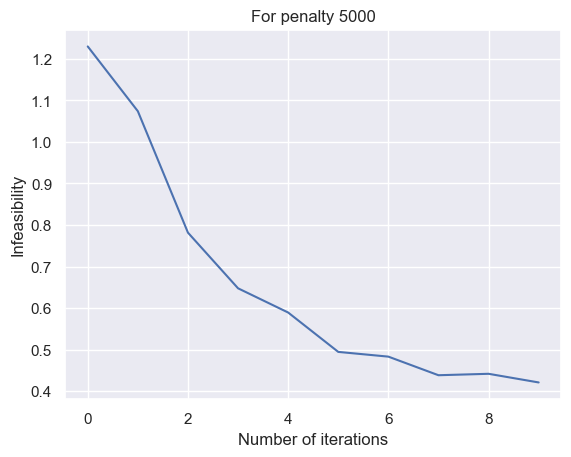

In [43]:
#Plot 
import matplotlib.pyplot as plt
import seaborn as sb

x = [i for i in range(max_iter)]
y = solution['infeasibility_arr']

sb.set(style='darkgrid')
plt.figure()
plt.plot(x,y)

plt.title("For penalty 5000")
plt.xlabel("Number of iterations")
plt.ylabel("Infeasibility")
    
plt.show()

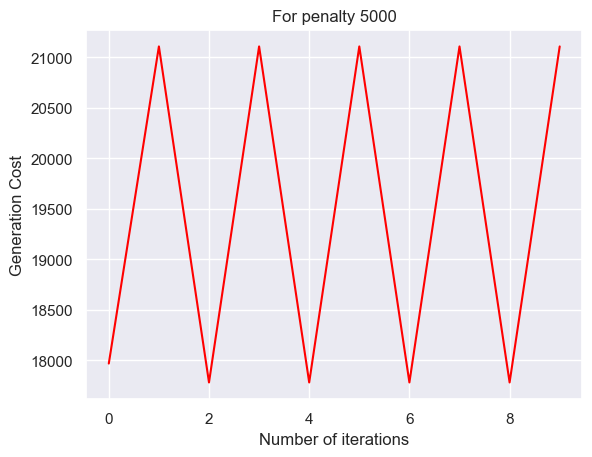

In [44]:
#Plot 
import matplotlib.pyplot as plt
import seaborn as sb

x = [i for i in range(max_iter)]
y = solution['generation_cost']

sb.set()
plt.figure()
plt.plot(x,y,color='red')

plt.title("For penalty 5000")
plt.xlabel("Number of iterations")
plt.ylabel("Generation Cost")
    
plt.show()

What we can see when implementing the algorithm can get us to better results on constraint violations and sometimes on the objective function, specially when the number of nodes increases. The **penalty term** (\rho) we choose will drastically impact the divergence of the algorithm

### Graph results


## Summary of the Approach

The ADMM implementation for the AC-OPF problem involves the following key components:

1. **Decomposition of the Global Problem:**
   - The global AC-OPF problem is decomposed into local subproblems corresponding to individual machines (generators or buses).

2. **Local Optimization:**
   - Each machine solves its own optimization problem, considering local constraints and objectives, and updates its local variables.

3. **Shared Variables and Consensus:**
   - Power flows between buses are treated as shared variables requiring consensus.
   - The orchestrator ensures that the shared variables are updated consistently across the network.

4. **Dual Variables and Augmented Lagrangian:**
   - Dual variables are used to enforce consensus constraints.
   - The augmented Lagrangian incorporates penalty terms to penalize discrepancies between local and shared variables.

5. **Iterative Updates via ADMM:**
   - The algorithm iteratively updates local variables, shared variables, and dual variables.
   - Convergence is achieved when the solutions are consistent and optimal across the entire network.

